In [23]:
import pandas as pd
import numpy as np


df=pd.read_csv('HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


Displaying plot for satisfaction_level


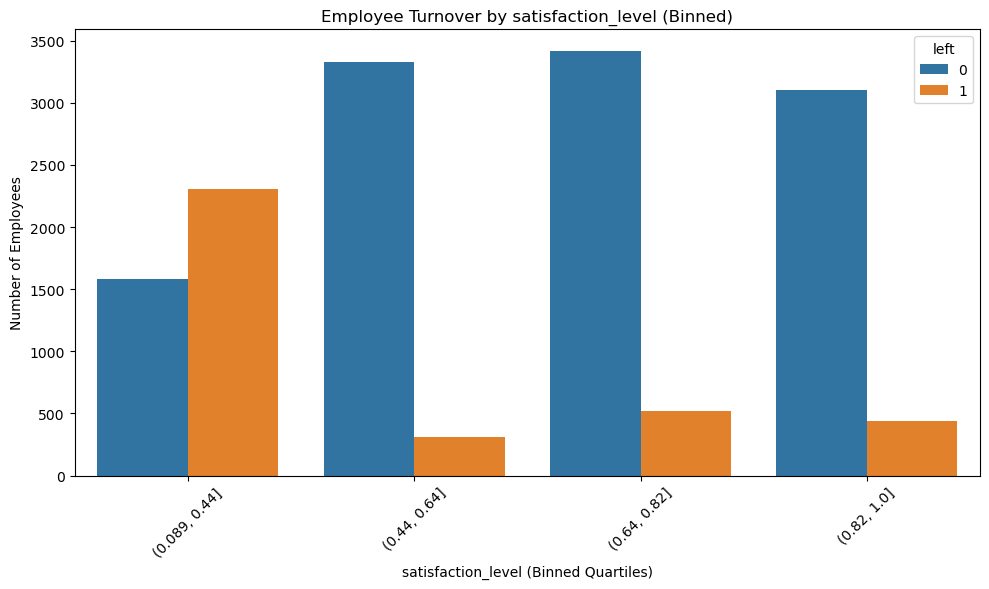

Displaying plot for last_evaluation


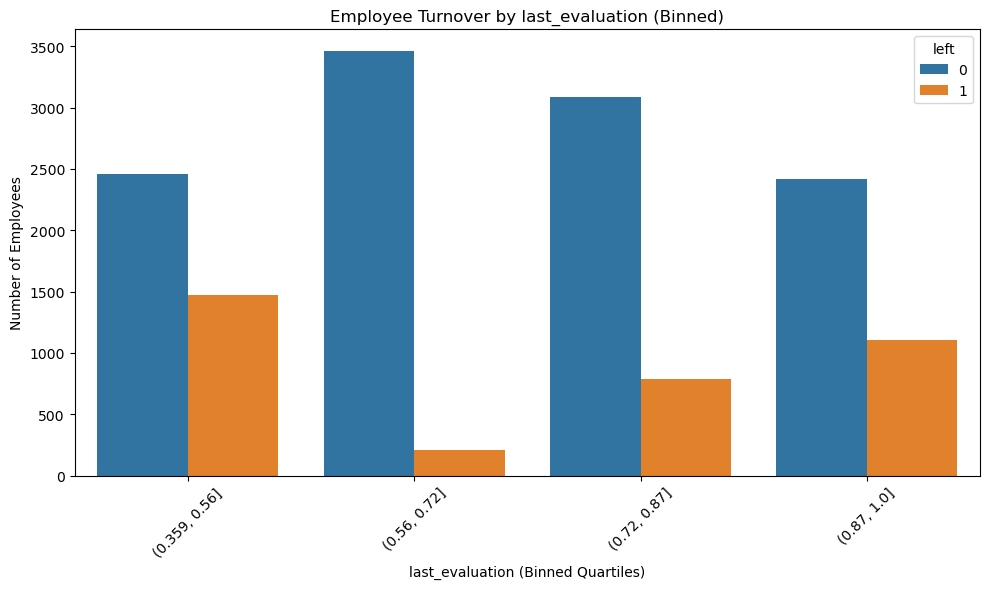

Displaying plot for number_project


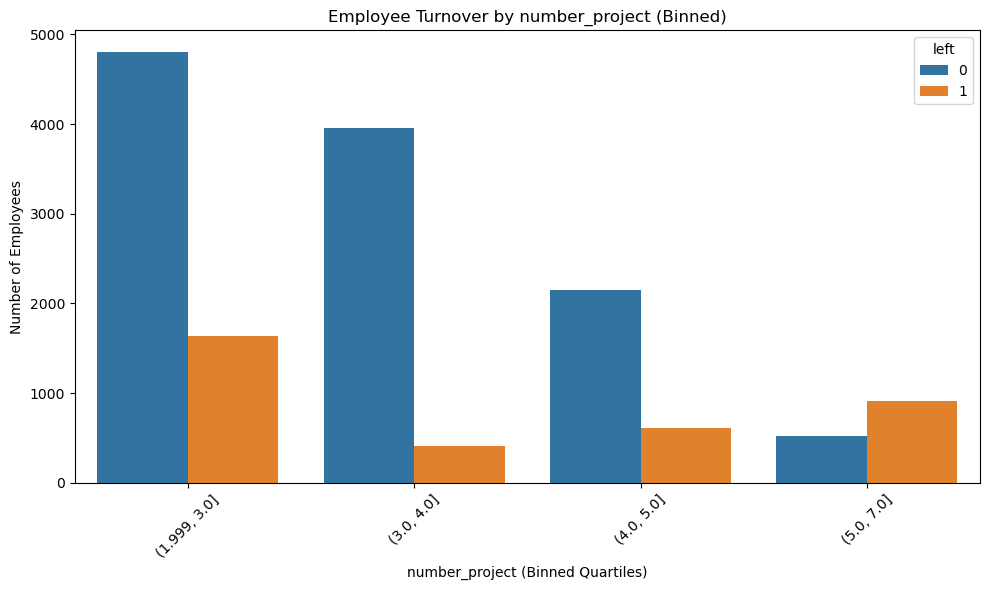

Displaying plot for average_montly_hours


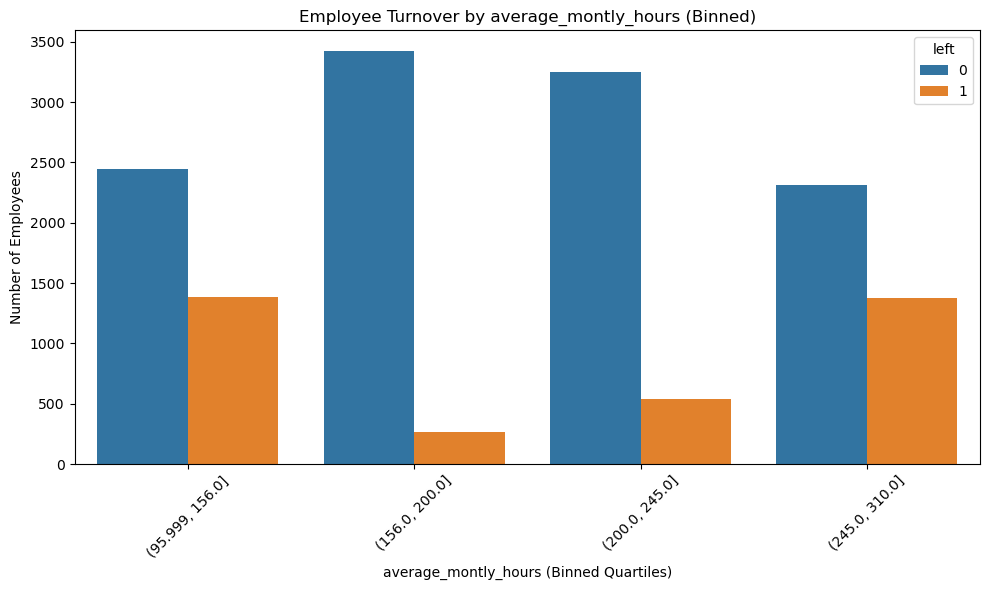

Displaying plot for time_spend_company


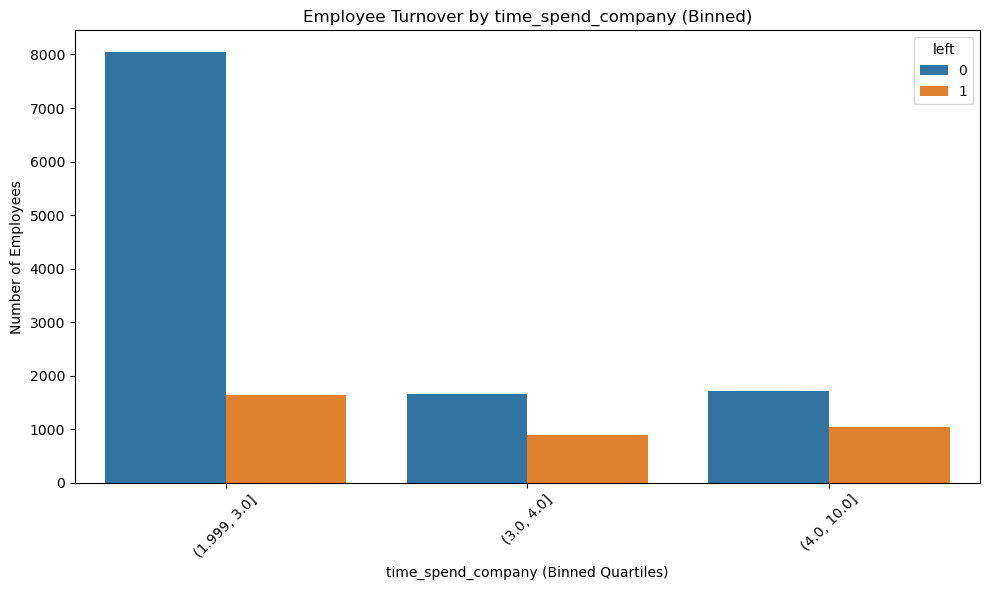

Displaying plot for Work_accident


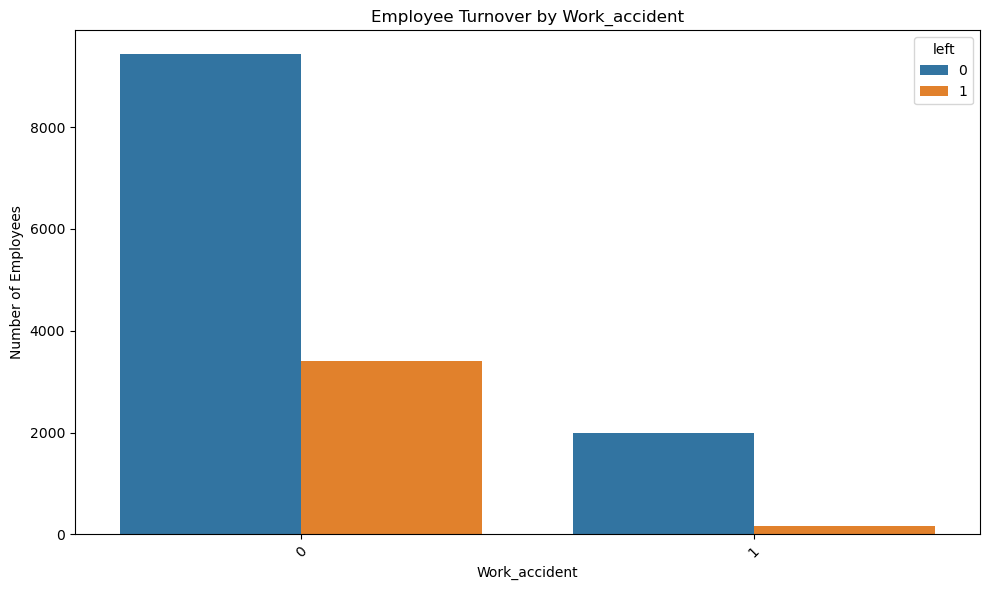

Displaying plot for promotion_last_5years


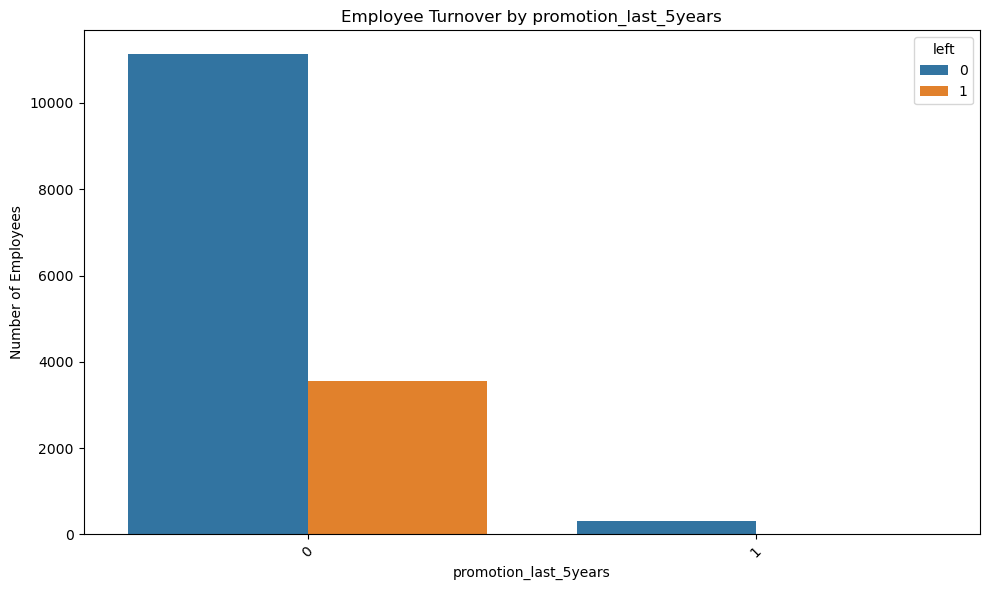

Displaying plot for Department


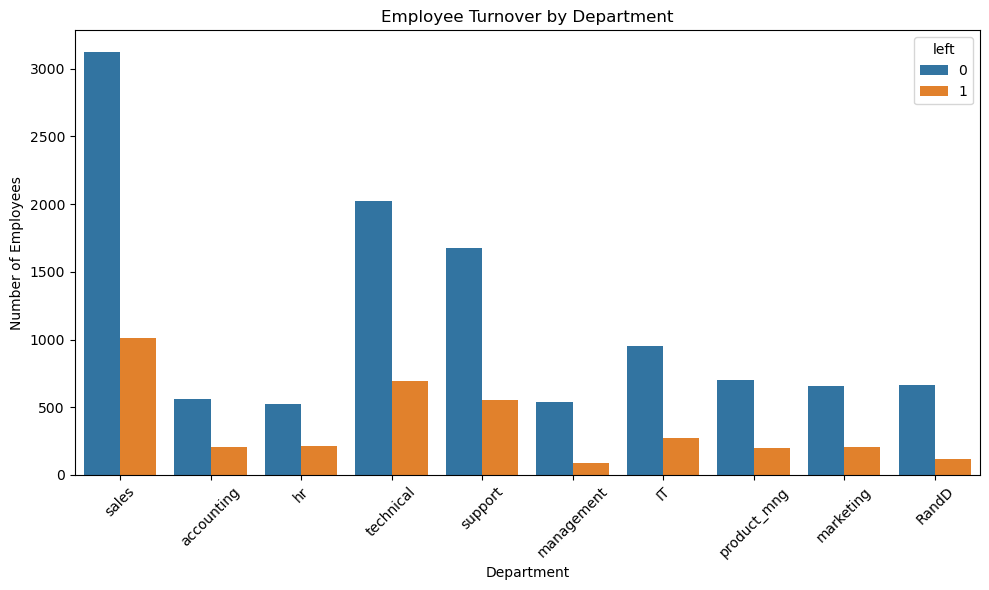

Displaying plot for salary


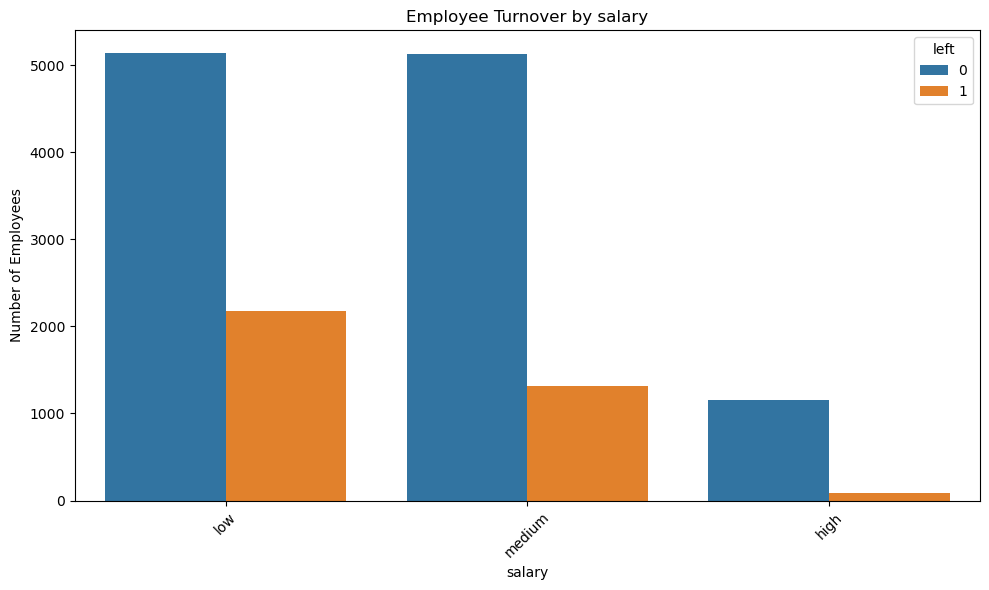

All plots have been displayed.


In [24]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Optional, will check if available
import numpy as np

# Check if seaborn is available
try:
    import seaborn
    seaborn_available = True
except ImportError:
    seaborn_available = False

# Read the CSV data
data = pd.read_csv('HR_comma_sep.csv')

# Define numerical and categorical columns
numerical_cols = ['satisfaction_level', 'last_evaluation', 'number_project', 
                  'average_montly_hours', 'time_spend_company']
categorical_cols = ['Work_accident', 'promotion_last_5years', 'Department', 'salary']
target_col = 'left'

# Set default matplotlib style
plt.style.use('default')

# Function to display numerical bar plot (with binning)
def plot_numerical_feature(col):
    plt.figure(figsize=(10, 6))
    # Bin numerical data into 4 bins based on quartiles
    data['binned'] = pd.qcut(data[col], q=4, duplicates='drop')
    if seaborn_available:
        sns.countplot(data=data, x='binned', hue=target_col)
    else:
        # Manual count plot for matplotlib
        counts = data.groupby(['binned', target_col]).size().unstack(fill_value=0)
        x = range(len(counts.index))
        width = 0.35
        plt.bar([i - width/2 for i in x], counts[0], width, label='Stayed')
        plt.bar([i + width/2 for i in x], counts[1], width, label='Left')
        plt.xticks(x, counts.index, rotation=45)
        plt.legend(title='Left')
    plt.title(f'Employee Turnover by {col} (Binned)')
    plt.xlabel(f'{col} (Binned Quartiles)')
    plt.ylabel('Number of Employees')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    plt.close()
    # Remove temporary binned column
    data.drop('binned', axis=1, inplace=True)

# Function to display categorical bar plot
def plot_categorical_feature(col):
    plt.figure(figsize=(10, 6))
    if seaborn_available:
        sns.countplot(data=data, x=col, hue=target_col)
    else:
        # Manual count plot for matplotlib
        counts = data.groupby([col, target_col]).size().unstack(fill_value=0)
        x = range(len(counts.index))
        width = 0.35
        plt.bar([i - width/2 for i in x], counts[0], width, label='Stayed')
        plt.bar([i + width/2 for i in x], counts[1], width, label='Left')
        plt.xticks(x, counts.index, rotation=45)
        plt.legend(title='Left')
    plt.title(f'Employee Turnover by {col}')
    plt.xlabel(col)
    plt.ylabel('Number of Employees')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    plt.close()

# Display individual plots for numerical columns
for col in numerical_cols:
    print(f"Displaying plot for {col}")
    plot_numerical_feature(col)

# Display individual plots for categorical columns
for col in categorical_cols:
    print(f"Displaying plot for {col}")
    plot_categorical_feature(col)

print("All plots have been displayed.")

In [25]:


# Define numerical columns
numerical_cols = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']

# Compute mean for numerical columns only, grouped by 'left'
means = df[numerical_cols + ['left']].groupby('left').mean()
print(means)

      satisfaction_level  last_evaluation  number_project  \
left                                                        
0               0.666810         0.715473        3.786664   
1               0.440098         0.718113        3.855503   

      average_montly_hours  time_spend_company  
left                                            
0               199.060203            3.380032  
1               207.419210            3.876505  


Finding the corelation between each features and plot them

In [26]:
df=df.drop(['salary','Department'],axis='columns')
corr=df.corr()
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<Axes: >

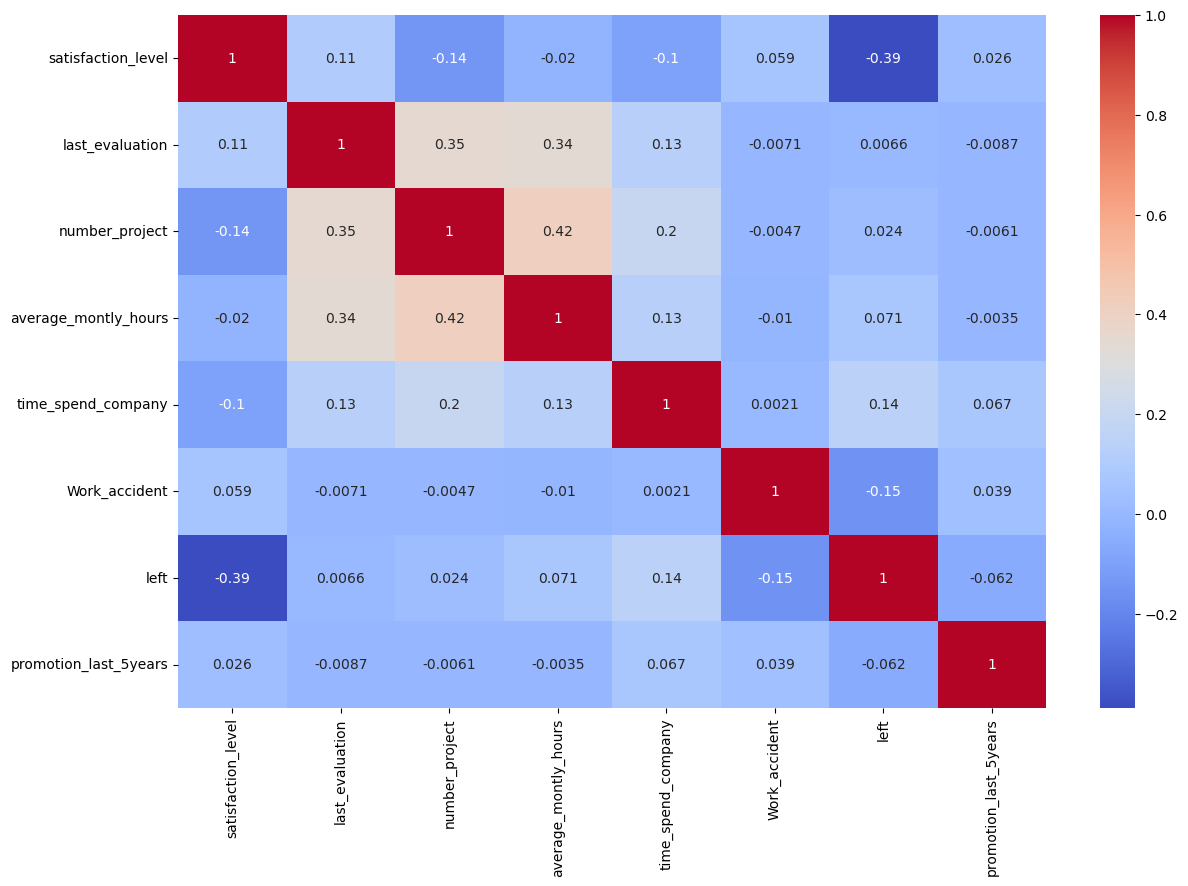

In [27]:
#display corealation matrix  using heatmap
plt.figure(figsize=(14,9))
sns.heatmap(corr,annot=True,cmap='coolwarm')

To applly logistic regrassion we have to remind this things and follow this steps        

লজিস্টিক রিগ্রেশন প্রয়োগ করতে নিচের ধাপগুলো অনুসরণ করতে হবে:

১. ডেটা লোড এবং প্রিপ্রসেসিং
আপনার ডেটাসেটে একাধিক ফিচার রয়েছে, যেমন satisfaction_level, last_evaluation, number_project, average_montly_hours, time_spend_company, Work_accident, promotion_last_5years, Department, এবং salary। টার্গেট ভেরিয়েবল হলো 'left'। লজিস্টিক রিগ্রেশন প্রয়োগের আগে ডেটা প্রস্তুত করতে হবে:

মিসিং ভ্যালু পরীক্ষা করুন: ডেটাসেটে কোনো মিসিং ভ্যালু থাকলে তা হ্যান্ডেল করতে হবে। উদাহরণস্বরূপ, df.dropna() দিয়ে মিসিং ভ্যালু সরিয়ে ফেলা যায় বা মিডিয়ান/মিন দিয়ে পূরণ করা যায় (df.fillna(df.mean()))।


ক্যাটাগরিকাল ভেরিয়েবল এনকোডিং:
salary: এটি একটি অর্ডিনাল ক্যাটাগরিকাল ভেরিয়েবল (low, medium, high)। এটিকে সংখ্যায় রূপান্তর করতে হবে, যেমন: low=0, medium=1, high=2।

Department: এটি একটি নন-অর্ডিনাল ক্যাটাগরিকাল ভেরিয়েবল। এটিকে ওয়ান-হট এনকোডিং (pd.get_dummies()) ব্যবহার করে বাইনারি কলামে রূপান্তর করতে হবে।

ফিচার স্কেলিং: লজিস্টিক রিগ্রেশনের জন্য ফিচারগুলোর স্কেল একই রাখা ভালো। উদাহরণস্বরূপ, average_montly_hours (100-300) এবং satisfaction_level (0-1) এর স্কেল আলাদা। StandardScaler বা MinMaxScaler ব্যবহার করে ফিচারগুলো স্ট্যান্ডার্ডাইজ করা যায়।

ফিচার সিলেকশন: সব ফিচার ব্যবহার করা যায়, তবে কিছু ফিচার (যেমন, satisfaction_level বা time_spend_company) টার্গেটের সাথে বেশি সম্পর্কযুক্ত হতে পারে। কোরিলেশন ম্যাট্রিক্স ব্যবহার করে গুরুত্বপূর্ণ ফিচার চিহ্নিত করা যায়।


২. ডেটা স্প্লিট করা
লজিস্টিক রিগ্রেশন মডেল ট্রেনিং এবং টেস্টিংয়ের জন্য ডেটাসেটকে দুই ভাগে ভাগ করতে হবে:

ট্রেনিং সেট (70-80%): মডেল শেখার জন্য।
টেস্টিং সেট (20-30%): মডেলের পারফরম্যান্স পরীক্ষার জন্য। train_test_split ফাংশন ব্যবহার করে এটি করা যায়।

৩. লজিস্টিক রিগ্রেশন মডেল ট্রেনিং
scikit-learn এর LogisticRegression ক্লাস ব্যবহার করে মডেল ট্রেন করা যায়। মডেল ফিট করার সময় ফিচার ম্যাট্রিক্স (X) এবং টার্গেট ভেরিয়েবল (y) প্রদান করতে হবে।


৪. মডেল ইভালুয়েশন
মডেলের পারফরম্যান্স মূল্যায়নের জন্য নিচের মেট্রিক্স ব্যবহার করা যায়:

Accuracy: মডেল কতগুলো প্রেডিকশন সঠিক করেছে।
Precision, වাট Recall: ট্রু পজিটিভ এবং ফলস পজিটিভের হার।
F1 Score: প্রিসিশন এবং রিকলের হারমোনিক মিন।
Confusion Matrix: প্রেডিকশনের ট্রু পজিটিভ, ফলস পজিটিভ, ট্রু নেগেটিভ, ফলস নেগেটিভ দেখায়।
ROC-AUC: মডেলের ক্লাসিফিকেশন কোয়ালিটি মাপে।

৫. বিবেচনার বিষয়গুলো

লজিস্টিক রিগ্রেশন প্রয়োগের সময় নিচের বিষয়গুলো বিবেচনা করতে হবে:

ডেটা ব্যালেন্স: 'left' কলামে যদি 0 এবং 1 এর মধ্যে ব্যালেন্স না থাকে (যেমন, অনেক বেশি 0), তাহলে মডেল বায়াসড হতে পারে। এসময় ওভারস্যাম্পলিং (SMOTE) বা আন্ডারস্যাম্পলিং ব্যবহার করা যায়।

মাল্টিকলিনিয়ারিটি: ফিচারগুলোর মধ্যে উচ্চ কোরিলেশন থাকলে মডেলের পারফরম্যান্স প্রভাবিত হতে পারে। কোরিলেশন ম্যাট্রিক্স চেক করে অতিরিক্ত সম্পর্কযুক্ত ফিচার সরানো যায়।

ফিচার ইম্পরট্যান্স: লজিস্টিক রিগ্রেশনের কোএফিসিয়েন্টস (coef_) ব্যবহার করে কোন ফিচার টার্গেটের উপর বেশি প্রভাব ফেলে তা জানা যায়।

হাইপারপ্যারামিটার টিউনিং: LogisticRegression এর প্যারামিটার যেমন C (রেগুলারাইজেশন স্ট্রেন্থ) টিউন করে মডেলের পারফরম্যান্স উন্নত করা যায়।

ওভারফিটিং: অতিরিক্ত ফিচার বা জটিল মডেলের কারণে ওভারফিটিং হতে পারে। রেগুলারাইজেশন (L1 বা L2) ব্যবহার করে এটি নিয়ন্ত্রণ করা যায়।


In [28]:
df=pd.read_csv('HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [29]:

# categorical encoding for the salary  section(using ordinal encoding)

salary_mapping={'low': 0, 'medium': 1, 'high': 2}
df['salary_encoded']=df['salary'].map(salary_mapping)
df



,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,salary_encoded
0,0.38,0.53,2,157,3,0,1,0,sales,low,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,0
14995,0.37,0.48,2,160,3,0,1,0,support,low,0
14996,0.37,0.53,2,143,3,0,1,0,support,low,0
14997,0.11,0.96,6,280,4,0,1,0,support,low,0


In [30]:
#Encoding for depertment (using pandas one hot encoding)
dummies=pd.get_dummies(df['Department']).astype(int)
dummies

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,0,1,0
14995,0,0,0,0,0,0,0,0,1,0
14996,0,0,0,0,0,0,0,0,1,0
14997,0,0,0,0,0,0,0,0,1,0


In [31]:
df_dums=pd.concat([df,dummies],axis='columns')
df=df_dums
df=df.drop(['salary','Department'],axis='columns')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_encoded,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [32]:
#handaling missing value
df.fillna(df.mean())
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_encoded,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [33]:
# initialize the target and test variable
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X=df.drop(['left'],axis='columns')
Y=df['left']

X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=42)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

print(pd.DataFrame(X_train_scaled, columns=X.columns).head())



   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0            1.555391        -0.619346       -0.653412             -0.260887   
1           -1.818394         0.372007        0.156954             -0.100652   
2            0.752109         0.488637       -0.653412             -0.521269   
3            0.189811         0.838527        0.156954             -1.783117   
4           -2.019214         1.246731        2.588050              1.661929   

   time_spend_company  Work_accident  promotion_last_5years  salary_encoded  \
0            0.340617      -0.411003              -0.149989       -0.935203   
1            1.024071      -0.411003              -0.149989        2.207635   
2           -1.026293      -0.411003              -0.149989        0.636216   
3            1.707526      -0.411003              -0.149989        0.636216   
4            0.340617      -0.411003              -0.149989       -0.935203   

        IT     RandD  accounting       hr  m

In [34]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression(random_state=42)
model.fit(X_train_scaled,Y_train)

Y_ped=model.predict(X_test_scaled)
Y_ped

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
from sklearn.metrics import accuracy_score
Accurecy= accuracy_score(Y_test,Y_ped)
Accurecy

0.7896666666666666